# Practice Problem - Monte-Carlo Error Propagation

## Part 1

You have likely encountered the concept of propagation of uncertainty before (see [the usual rules here](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas)). The idea is that given measurements with uncertainties, we can find the uncertainty on the final result of an equation.

For example, let us consider the following equation:

$$F = \frac{G~M_1~M_2}{r^2}$$

which gives the gravitational force between two masses $M_1$ and $M_2$ separated by a distance $r$.

Let us now imagine that we have two masses:

$$M_1=40\times10^4\pm0.05\times10^4\rm{kg}$$

and

$$M_2=30\times10^4\pm0.1\times10^4\rm{kg}$$

separated by a distance:

$$r=3.2\pm0.01~\rm{m}$$

where the uncertaintes are the standard deviations of Gaussian distributions which could be e.g. measurement errors.

We also know:

$$G = 6.67384\times10^{-11}~\rm{m}^3~\rm{kg}^{-1}~\rm{s}^{-2}$$

(exact value, no uncertainty)

### Solution 1st subpart

**QUESITO**

Use the [standard error propagation rules](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas) to determine the resulting force and uncertainty in your script (you can just derive the equation by hand and implement it in a single line in your code).

**SOLUZIONE**

Facendo i calcoli a mano, è utilizzando la *regola della propagazione degli errori standard* l'incertezza della forza $F$ è data dall'equazione:
$$ 
\Delta F = \frac{G M_1 M_2}{r^2} \sqrt{
\left(\frac{\Delta M_1}{M_1}\right)^2 +
\left(\frac{\Delta M_2}{M_2}\right)^2 +
\left(2\frac{\Delta r}{r}\right)^2} $$

**Di seguito il codice per calcolare la Forza $F$ e l'incertezza $\Delta F$:**

In [3]:
import numpy as np

# Dati con incertezze
G = 6.67384e-11  # m^3 kg^-1 s^-2 (esatto)
M1 = 40e4        # kg
delta_M1 = 0.05e4 # kg
M2 = 30e4        # kg
delta_M2 = 0.1e4  # kg
r = 3.2          # m
delta_r = 0.01   # m

# Calcolo di F
F_analytical = (G * M1 * M2) / (r ** 2)

# Calcolo di Delta F
delta_F = F_analytical * np.sqrt(
    (delta_M1 / M1)**2 + 
    (delta_M2 / M2)**2 + 
    (2 * delta_r / r)**2
)

print(f"Forza F = {F_analytical:.3e} N")
print(f"Incertezza Delta F = {delta_F:.3e} N")

Forza F = 7.821e-01 N
Incertezza Delta F = 5.625e-03 N


### Solution 2nd subpart
**QUESITO**

Now, we can try using a **Monte-Carlo** technique instead. The idea behind Monte-Carlo techniques is to generate many possible solutions using random numbers and using these to look at the overall results. In the above case, you can propagate uncertainties with a Monte-Carlo method by doing the following:

* randomly sample values of $M_1$, $M_2$, and $r$, 1000000 times, using the means and standard deviations given above

* compute the gravitational force for each set of values

You should do this with Numpy arrays, and **without any loops**. You should then get an array of 1000000 different values for the forces.

**SOLUZIONE**

In [4]:
import numpy as np

# Parametri dati (media e deviazione standard)
mu_M1 = 40e4          # 40*10^4 kg
sigma_M1 = 0.05e4     # 0.05*10^4 kg
mu_M2 = 30e4          # 30*10^4 kg
sigma_M2 = 0.1e4      # 0.1*10^4 kg
mu_r = 3.2            # 3.2 m
sigma_r = 0.01        # 0.01 m
G = 6.67384e-11       # Costante gravitazionale
n_samples = 1_000_000 # Numero di campioni

# Campionamento da distribuzioni Gaussiane
M1_samples = np.random.normal(mu_M1, sigma_M1, n_samples)
M2_samples = np.random.normal(mu_M2, sigma_M2, n_samples)
r_samples = np.random.normal(mu_r, sigma_r, n_samples)

# Calcolo della forza F per ogni campione
F_samples = G * M1_samples * M2_samples / r_samples**2

# Risultati (media e deviazione standard di F)
F_mean = np.mean(F_samples)
F_std = np.std(F_samples)

print(f"Forza media: {F_mean:.3e} N")
print(f"Deviazione standard: {F_std:.3e} N")

Forza media: 7.821e-01 N
Deviazione standard: 5.622e-03 N


### Solution 3rd subpart
**QUESITO**

Make a plot of the normalized histogram of these values of the force, and then overplot a Gaussian function with the mean and standard deviation derived with the standard error propagation rules. Make sure that you pick the range of x values in the plot wisely, so that the two distributions can be seen. Make sure there are also a sensible number of bins in the histogram so that you can compare the shape of the histogram and the Gaussian function. The two distributions should agree pretty well.

**SOLUZIONE**

Formula Gaussina: $foruula gaussiana Latex$

Per stabilire i 

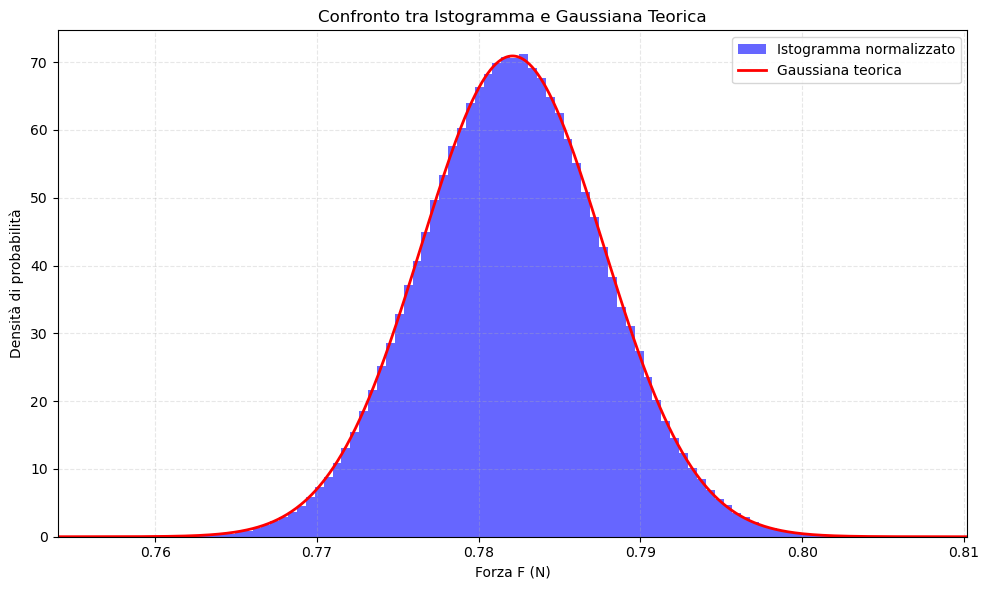

In [5]:
import matplotlib.pyplot as plt

# Creazione dell'istogramma normalizzato
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(
    F_samples, 
    bins=100, 
    density=True, 
    alpha=0.6, 
    color='blue', 
    label='Istogramma normalizzato'
)

# Sovrapposizione della Gaussiana teorica
x = np.linspace(
    F_analytical - 5*delta_F, 
    F_analytical + 5*delta_F, 
    1000
)
# Formula della distribuzione normale
gaussian = (1 / (delta_F * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - F_analytical)/delta_F)**2)
plt.plot(x, gaussian, 'r-', linewidth=2, label='Gaussiana teorica')

# Personalizzazione del grafico
plt.title('Confronto tra Istogramma e Gaussiana Teorica')
plt.xlabel('Forza F (N)')
plt.ylabel('Densità di probabilità')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlim(F_analytical - 5*delta_F, F_analytical + 5*delta_F)
plt.tight_layout()
plt.show()

## Part 2

Now repeat the experiment above with the following values:

$$M_1=40\times10^4\pm2\times10^4\rm{kg}$$
$$M_2=30\times10^4\pm10\times10^4\rm{kg}$$
$$r=3.2\pm1.0~\rm{m}$$

and as above, produce a plot.

In this case, which method do you think is more accurate? Why? What do you think are the advantages of using a Monte-Carlo technique?

### Soluzione Part 2

**IMPORTA I MODULI**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

**DEFINISCI I PARAMETRI**

In [7]:
# Parametri dati (media e deviazione standard)
M1 = mu_M1 = 40e4                # 40*10^4 kg
delta_M1 = sigma_M1 = 2e4        # 2*10^4 kg
M2 = mu_M2 = 30e4                # 30*10^4 kg
delta_M2 = sigma_M2 = 10e4       # 10*10^4 kg
r = mu_r = 3.2                   # 3.2 m
delta_r = sigma_r = 1.0          # 1.0 m
G = 6.67384e-11                  # Costante gravitazionale
n_samples = 1_000_000            # Numero di campioni

**CALCOLO DI $F$ E $\Delta F$ IN MANIERA ANALITICA**

In [9]:
# Calcolo di F
F_analytical = (G * M1 * M2) / (r ** 2)

# Calcolo di Delta F
delta_F = F_analytical * np.sqrt(
    (delta_M1 / M1)**2 + 
    (delta_M2 / M2)**2 + 
    (2 * delta_r / r)**2
)

print(f"Forza F = {F_analytical:.3e} N")
print(f"Incertezza Delta F = {delta_F:.3e} N")

Forza F = 7.821e-01 N
Incertezza Delta F = 5.554e-01 N


**CALCOLO DI $F$ E $\Delta F$ CON IL METODO DI MONTECARLO**

In [10]:
# Campionamento da distribuzioni Gaussiane
M1_samples = np.random.normal(mu_M1, sigma_M1, n_samples)
M2_samples = np.random.normal(mu_M2, sigma_M2, n_samples)
r_samples = np.random.normal(mu_r, sigma_r, n_samples)

# Calcolo della forza F per ogni campione
F_samples = G * M1_samples * M2_samples / r_samples**2

# Risultati (media e deviazione standard di F)
F_mean = np.mean(F_samples)
F_std = np.std(F_samples)

print(f"Forza media: {F_mean:.3e} N")
print(f"Deviazione standard: {F_std:.3e} N")

Forza media: 1.067e+02 N
Deviazione standard: 5.536e+04 N


**PLOT DEI RISULTATI**

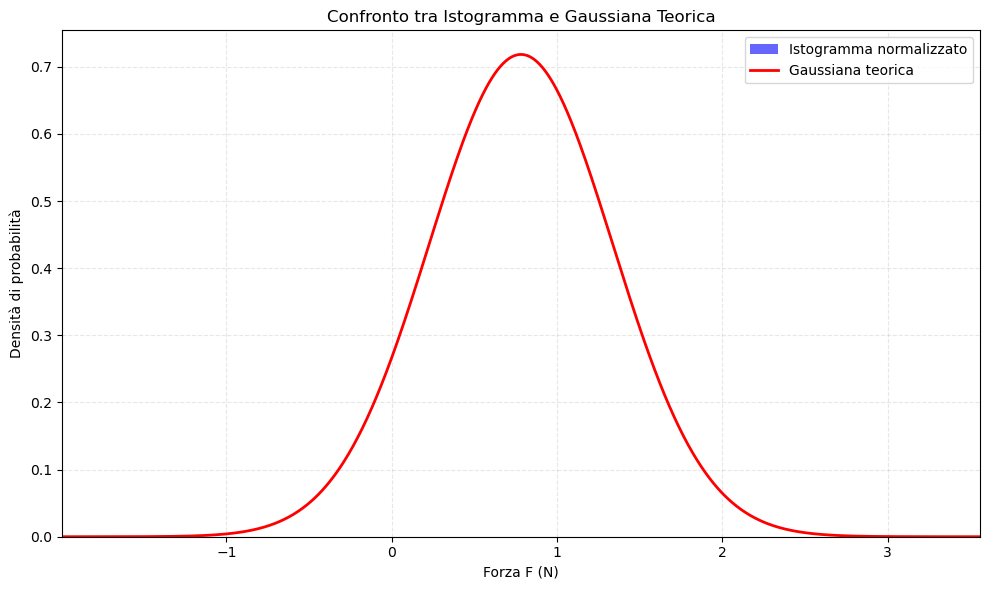

In [11]:
# Creazione dell'istogramma normalizzato
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(
    F_samples, 
    bins=100, 
    density=True, 
    alpha=0.6, 
    color='blue', 
    label='Istogramma normalizzato'
)

# Sovrapposizione della Gaussiana teorica
x = np.linspace(
    F_analytical - 5*delta_F, 
    F_analytical + 5*delta_F, 
    1000
)
# Formula della distribuzione normale
gaussian = (1 / (delta_F * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - F_analytical)/delta_F)**2)
plt.plot(x, gaussian, 'r-', linewidth=2, label='Gaussiana teorica')

# Personalizzazione del grafico
plt.title('Confronto tra Istogramma e Gaussiana Teorica')
plt.xlabel('Forza F (N)')
plt.ylabel('Densità di probabilità')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlim(F_analytical - 5*delta_F, F_analytical + 5*delta_F)
plt.tight_layout()
plt.show()

**DISCUSSIONE DEI RISULTATI**

C'è qualcosa che non va, l'istogramma nenache si vede.
Plotto di seguito l'istogramma e vedo i problemi:

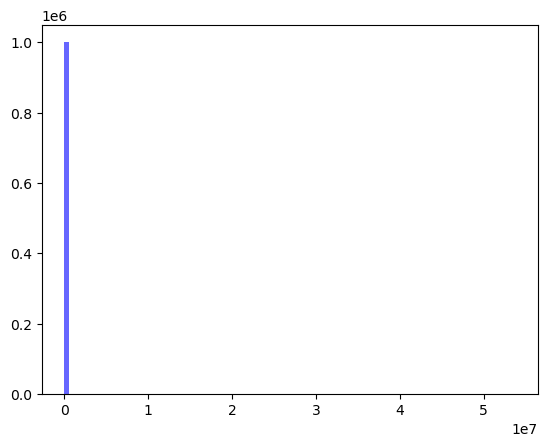

In [12]:
# Creazione dell'istogramma normalizzato
plt.hist(
    F_samples, 
    bins=100, 
    density=False, 
    alpha=0.6, 
    color='blue', 
    label='Istogramma normalizzato'
)
plt.show()

**POSSIBILI ERRORI**

First, common reasons for an empty histogram in Matplotlib include:

1. **All data points are outside the plotted range**: If the bins or x-axis limits are set incorrectly, the data might not fall within the visible area.

2. **Data contains NaN or invalid values**: If the F_samples array has NaN values, the histogram might not render.

3. **Log scale issues**: If the y-axis is set to log scale and there are zero counts in some bins, those bins won't appear.

4. **Bins parameter is incorrect**: Using too few bins or bins that don't cover the data range.

Since the user mentioned they changed parameters to larger uncertainties (sigma_M1=2e4, etc.), the F_samples might have a much wider spread, possibly including very large or invalid values. Let me check possible steps:

- **Check F_samples values**: Maybe some values are NaN or infinite due to division by very small r_samples (if r_samples can be zero or negative). Since r is sampled from a normal distribution with mu=3.2 and sigma=1.0, there's a chance some r_samples are negative or close to zero, leading to division by zero or very large F values.

- **Data range**: The automatic binning might not cover the actual range of F_samples, especially if there are extreme outliers.

- **Plotting parameters**: The xlim might be set too narrow, or the yscale is log with zero counts.

**POSSIBILI SOLUZIONI 1 - AGGIUSTO IL PLOT RANGE**

Invece di usare la regola delle 5 sigma come per il problema con errore piccolo uso un **range di x tale da includere almeno il 99% dei punti centrali generati con il metodo montecarlo**

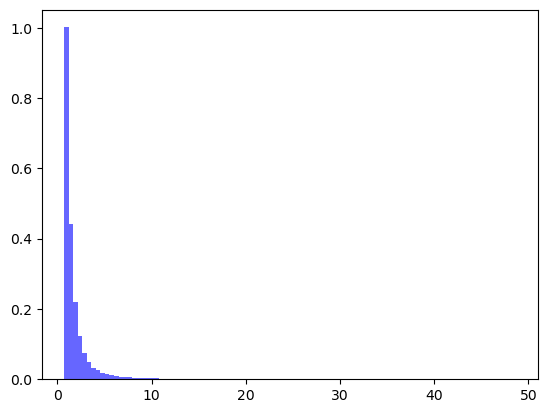

In [14]:
new_range = (0.75, np.percentile(F_samples, 99.75))

plt.hist(
    F_samples, 
    bins=100, 
    density=True, 
    alpha=0.6, 
    color='blue', 
    label='Monte Carlo',
    range= new_range  # Focus sul 99.5% centrale
)
plt.show()

**POSSIBILI SOLUZIONI 2 - ELIMINO I VALORI INCONSISTENTI**

Numero di NaN in F_samples: 0
Numero di infiniti in F_samples: 0
Valore minimo di F_samples: -91.83295298319707
Valore massimo di F_samples: 53750122.9042955
Numero di campioni validi: 997965


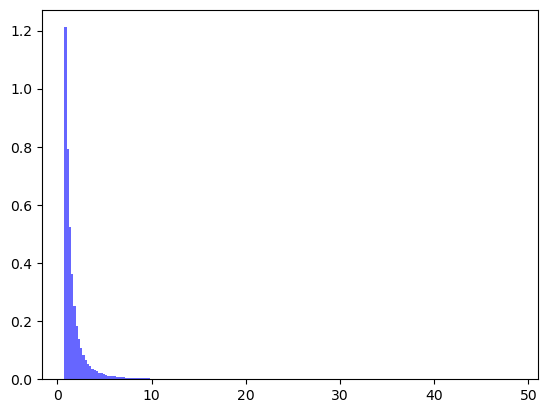

In [15]:
# Controlla valori NaN/infiniti
print("Numero di NaN in F_samples:", np.isnan(F_samples).sum())
print("Numero di infiniti in F_samples:", np.isinf(F_samples).sum())

# Controlla il range di F_samples
print("Valore minimo di F_samples:", np.nanmin(F_samples))
print("Valore massimo di F_samples:", np.nanmax(F_samples))

# Filtra r_samples <= 0 e F_samples non validi
valid_indices = (r_samples > 0)  & (M1_samples>0) & (M2_samples>0)& (~np.isnan(F_samples)) & (~np.isinf(F_samples))
F_samples_filtered = F_samples[valid_indices]

print("Numero di campioni validi:", len(F_samples_filtered))

plt.hist(
    F_samples_filtered, # Nuovi samples filtrati
    bins=200, 
    density=True, 
    alpha=0.6, 
    color='blue', 
    label='Monte Carlo',
    range=(new_range)  # Focus sul 98% centrale
)

plt.show()

**RISTAMPO I DUE PLOT PER FARE IL CONFRONTO ORA CHE L'ISTOGRAMMA è COERENTE**

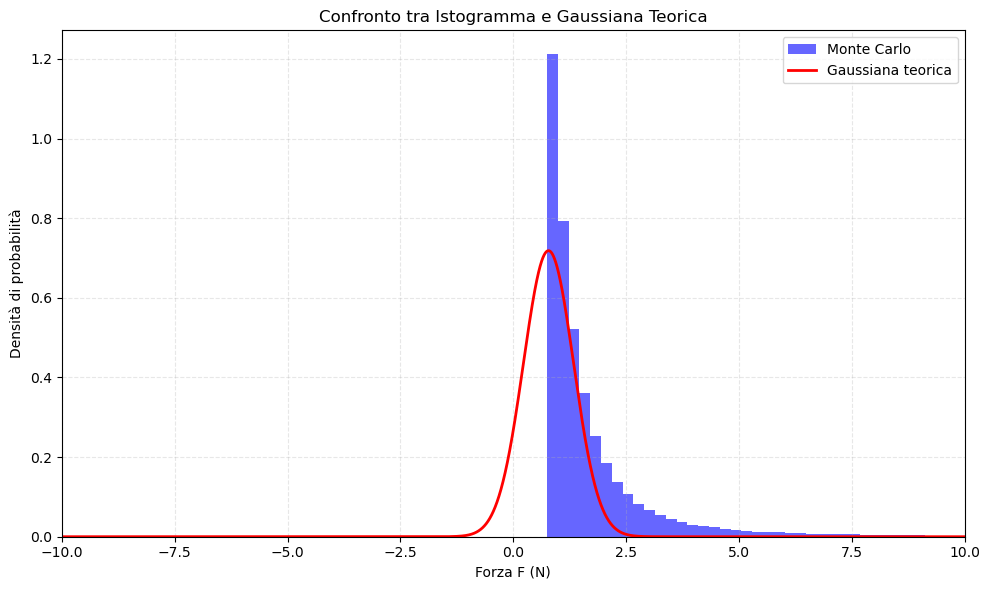

In [18]:
# Creazione dell'istogramma normalizzato
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(
    F_samples_filtered, # Nuovi samples filtrati
    bins=200, 
    density=True, 
    alpha=0.6, 
    color='blue', 
    label='Monte Carlo',
    range=(new_range)  # Focus sul 98% centrale
)

# Sovrapposizione della Gaussiana teorica
x = np.linspace(
    F_analytical - 100*delta_F, 
    F_analytical + 100*delta_F, 
    100000
)
# Formula della distribuzione normale
gaussian = (1 / (delta_F * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - F_analytical)/delta_F)**2)
plt.plot(x, gaussian, 'r-', linewidth=2, label='Gaussiana teorica')

# Personalizzazione del grafico
plt.title('Confronto tra Istogramma e Gaussiana Teorica')
plt.xlabel('Forza F (N)')
plt.ylabel('Densità di probabilità')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.xlim(-10,+10)
plt.tight_layout()
plt.show()

### Confronto tra metodo standard e Monte Carlo

With larger uncertainties, the distribution of F might not be Gaussian anymore. The analytical method assumes small uncertainties and linearity, which might not hold here. The Monte Carlo method should capture the true distribution, which could be skewed or have heavy tails.